### The domain of the problem
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### Problem Statement

In today’s world, banks play a key role in providing financial services to help people and business to achieve their goals as well as reach their potential. Banks lend money to people to help them buy new cars, homes, or even open new businesses. Against business, banks make loans to support them in hiring more employees, purchasing new equipment, investing in research and development, etc. However, working with more people and organizations requires the bank to be able to classify their customers or partners. Lending money to right customers would generate value directly for the economy and society. On the flip side, investing in wrong customers, who are not able to make money and return back to the bank, can bring the bank itself down, and also cause negative impact to the society.

This dateset includes 23 variables, based on these 23 variables, we'll use supervised learning to develop a predictive classification model, it can be used to predict if a client will do default payment next month or not, which will help the organizations to make better decisions. A predictive analytics application allows the organization to identify the risks and address them in real time to reach better outcomes. For example, when a customer asks to apply for a new credit card or increase their monthly credit balance, it is necessary for the bank to analyze available data related to that customer before making the decision. One of the criterion to classify the customer is whether the customer has been paying duly or having default payments in the last several months. 

### Data Exploration and Visualization

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
df = pd.read_excel("data.xls", header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

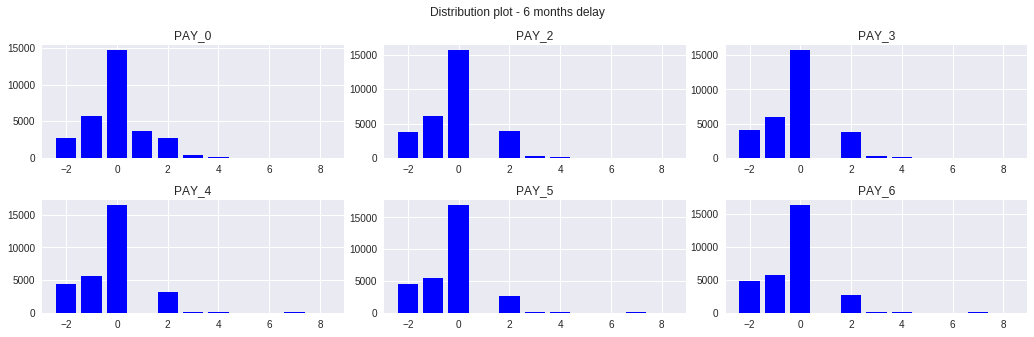

In [54]:
pay_status_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig, ax =› plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution plot - 6 months delay')

for i in range(len(pay_status_columns)):
   row,col = int(i/3), i%3

   d  = df[pay_status_columns[i]].value_counts()
   ax[row,col].bar(d.index, d, align='center', color='b')
   ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

#### We want to check if sex, marriage and education affect the default payment and the difference among different groups of people. 

##### 1. We have more female than male, but men have a higher defualt payment rate than women.

In [157]:
SEX = df.groupby(['SEX', 'default payment next month']).size().unstack()
SEX['perc'] = (SEX[1]/(SEX[0] + SEX[1])) 
SEX

default payment next month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


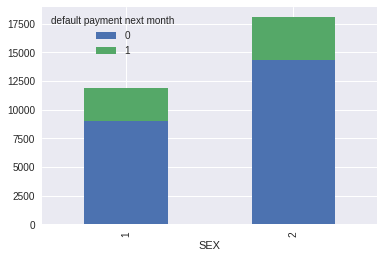

In [201]:
SEX = df.groupby(['SEX', 'default payment next month']).size().unstack()
SEX.plot(kind = 'bar', stacked = True)

##### 2. Married people and others have a higher default payment rate than single people.

In [184]:
df = df[df.MARRIAGE !=0]

In [185]:
MARRIAGE = df.groupby(['MARRIAGE', 'default payment next month']).size().unstack()
MARRIAGE['perc'] = (MARRIAGE[1]/(MARRIAGE[0] + MARRIAGE[1])) 
MARRIAGE

default payment next month,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


<Figure size 432x288 with 0 Axes>

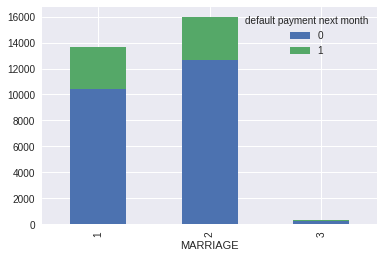

In [191]:
MARRIAGE = df.groupby(['MARRIAGE', 'default payment next month']).size().unstack()
plt.tight_layout(w_pad=0.5, h_pad=1.0)
MARRIAGE.plot(kind = 'bar', stacked = True)

##### 3. We have more well educated people, people graduated from university and high school have a higher default payment rate than others.

In [188]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
EDUCATION = df.groupby(['EDUCATION', 'default payment next month']).size().unstack()
EDUCATION['perc'] = (EDUCATION[1]/(EDUCATION[0] + EDUCATION[1])) 
EDUCATION

default payment next month,0,1,perc
EDUCATION,,,
1,8545,2036,0.192420
2,10695,3329,0.237379
3,3640,1233,0.253027
4,435,33,0.070513


<Figure size 432x288 with 0 Axes>

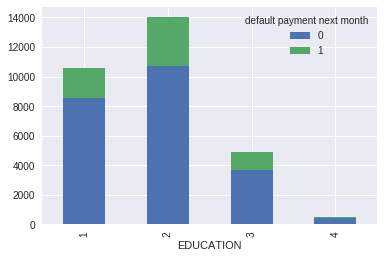

In [192]:
EDUCATION = df.groupby(['EDUCATION', 'default payment next month']).size().unstack()
plt.tight_layout(w_pad=0.5, h_pad=1.0)
EDUCATION.plot(kind = 'bar', stacked = True)

### Solution, Metrics and Benchmark

We'll try multiple calssification models to do the prediction. The models performance can be assessed by using the F1 score. Here we're using Decision Tree as a simple benchmark.

In [67]:
df.SEX = df.SEX.astype('category')
df.EDUCATION = df.EDUCATION.astype('category')
df.MARRIAGE = df.MARRIAGE.astype('category')
df['default payment next month'] = df['default payment next month'].astype('category')
features = df.drop('default payment next month',axis=1)
target = df['default payment next month']
num_cols = df.select_dtypes(exclude=['category'])
cat_cols = [i for i in features.columns if i not in num_cols]
features_dummies = pd.get_dummies(features, columns=cat_cols)
features_dummies.head(3)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(features_dummies, target, random_state = 42)
dtree = DecisionTreeClassifier(max_depth=1)
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train), dtree.score(X_test, y_test)

(0.8201701634816696, 0.81731925698249364)

In [197]:
dtree.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [198]:
f1_score(y_true = y_test, y_pred = dtree.predict(X_test))

0.43160083160083162

#### We got the f1 score as 40% by using Decision Tree model, which is not good enough to predict if a person will be doing default payment next month or not. For getting a better result, we can also try Gradient Boosting, Random Foresst, etc. models.